      pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...  
              color   opacity
1454198400  #cea5d0  1.000000
1456704000  #cda1ce  0.758066
1459382400  #cda0cd  0.799056
1461974400  #ca96c8  0.653160
1464652800  #d086c0  0.681304


True

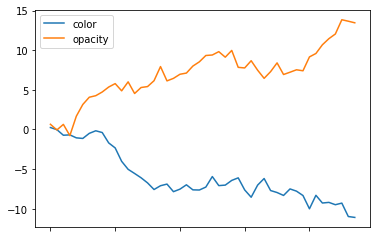

In [84]:
from folium.plugins import TimeSliderChoropleth
import folium
import os
import pandas as pd
import geopandas as gpd
import numpy as np
from branca.colormap import linear
from folium.plugins import TimeSliderChoropleth


assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

print(gdf.head())


n_periods, n_sample = 48, 40

assert n_sample < n_periods

datetime_index = pd.date_range('2016-1-1', periods=n_periods, freq='M')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index


styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())


cmap = linear.PuRd_09.scale(min_color, max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

print(styledata.get(0).head())
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}


m = folium.Map(zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict,

).add_to(m)
 
# Banana hammock
import webbrowser
filepath = os.path.join(os.getcwd(), 'a.html')
m.save(filepath)
webbrowser.open('file://' + filepath)